In [223]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [224]:
df=pd.read_csv("data/multiplegradesdataset.csv")

In [225]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [226]:
df.shape

(50, 5)

In [227]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

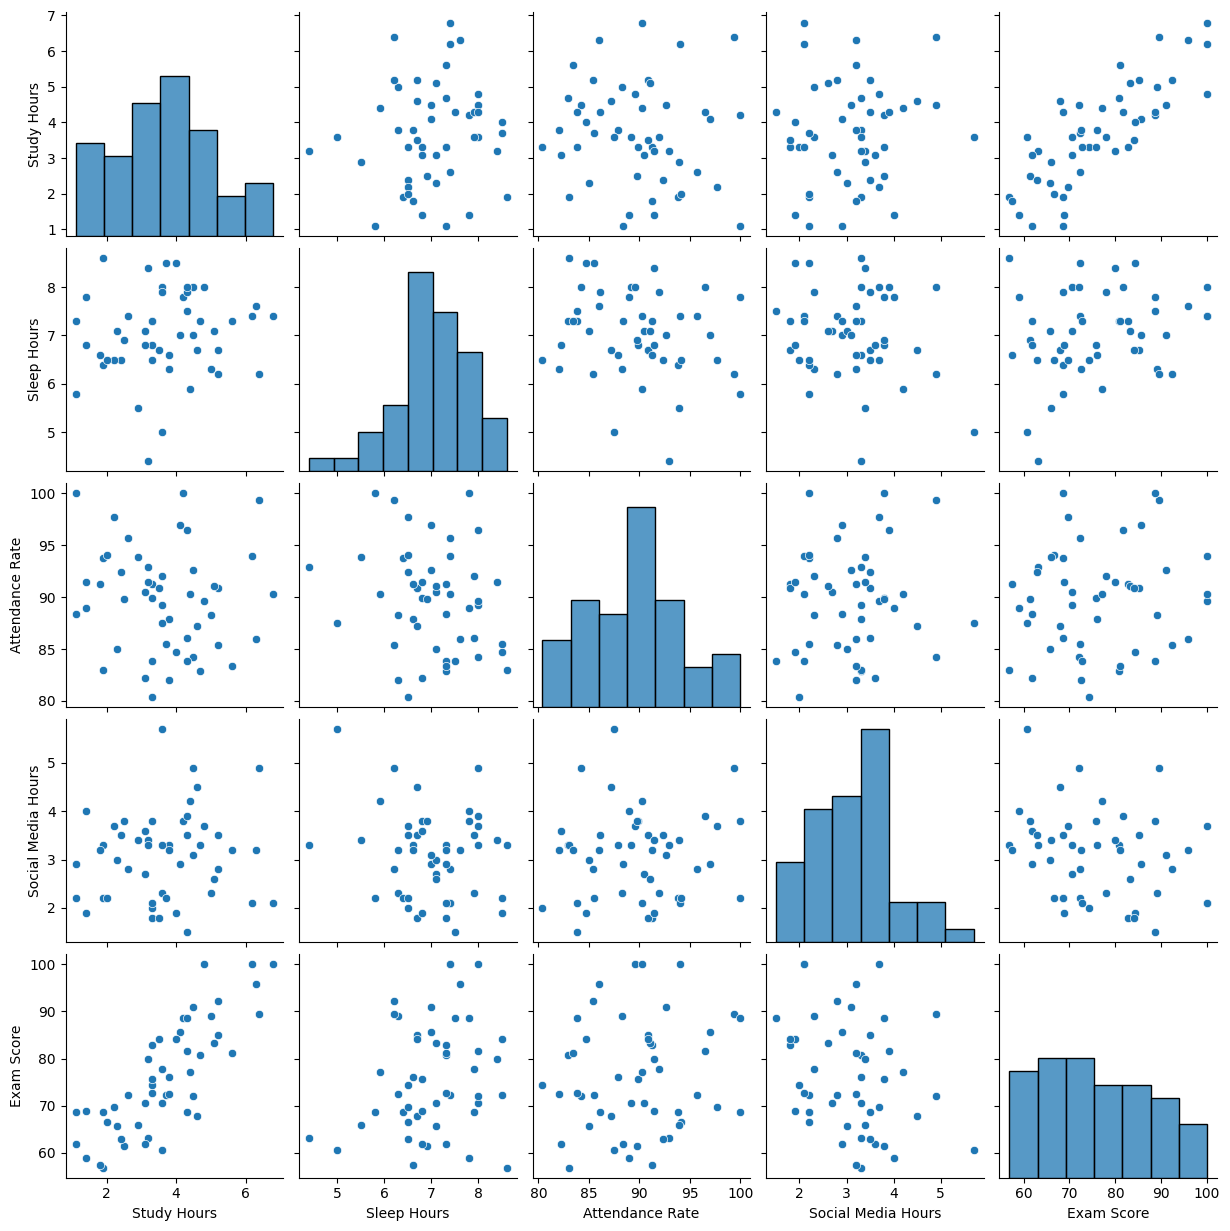

(None,)

In [228]:
sns.pairplot(df)
plt.show(),

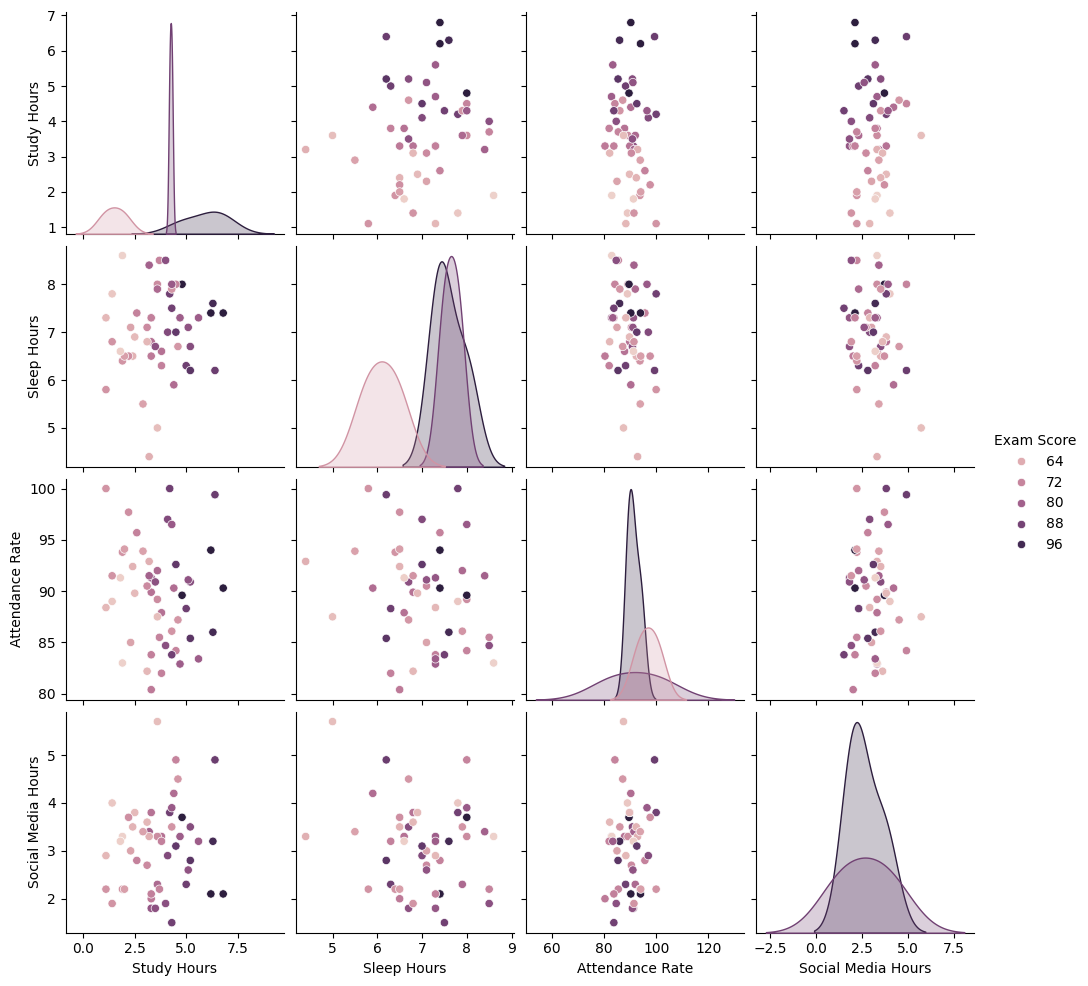

In [229]:
sns.pairplot(data=df, hue="Exam Score")
plt.show()

In [230]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Study Hours,50.0,3.668,1.401230,1.1,2.675,3.60,4.500,6.8
Sleep Hours,50.0,7.022,0.874419,4.4,6.500,7.05,7.575,8.6
Attendance Rate,50.0,89.736,4.924813,80.4,85.625,90.10,92.550,100.0
Social Media Hours,50.0,3.090,0.896990,1.5,2.225,3.20,3.575,5.7
Exam Score,50.0,76.070,11.709150,56.9,68.075,73.55,84.175,100.0


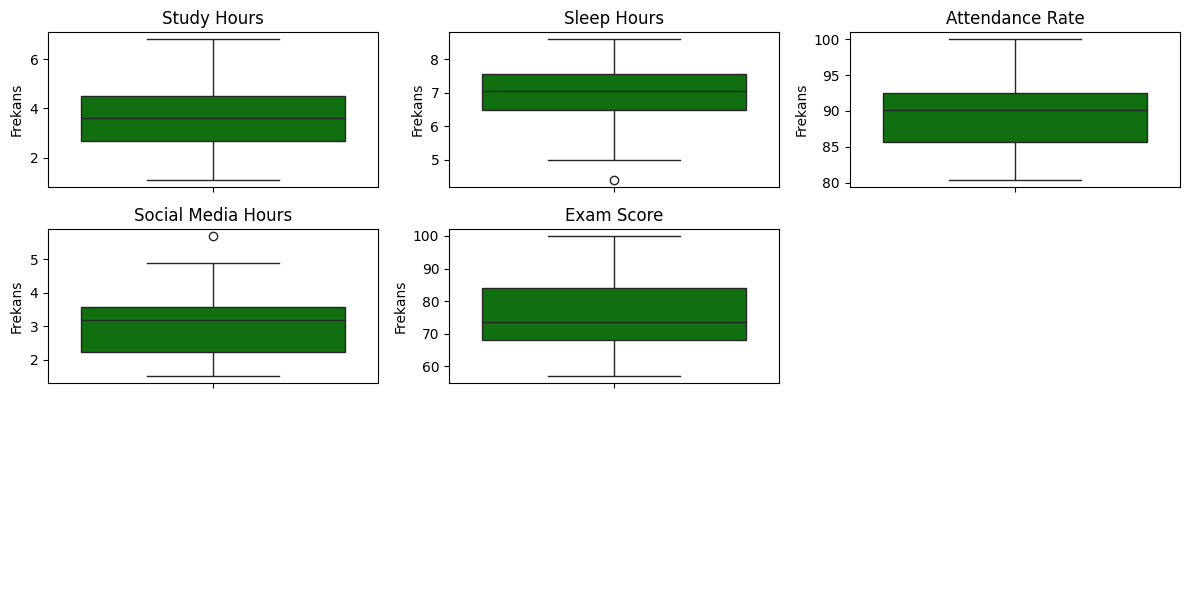

In [231]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig,axes=plt.subplots(ncols=3,nrows=3,figsize=(12,6))
# 2 boyutlu dizi olmasın diye
axes = axes.flatten()

numeric_cols=[feature for feature in df.columns if df[feature].dtype =="int" or df[feature].dtype =="float"]

for i, col in enumerate(numeric_cols):
    sns.boxplot(df[col], ax=axes[i], color="g")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frekans")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [232]:
"""def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower) & (df[column] <= upper)]
    return df_clean


df= remove_outlier(df, "Social Media Hours")
df= remove_outlier(df, "Sleep Hours")"""

'def remove_outlier(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower = Q1 - 1.5 * IQR\n    upper = Q3 + 1.5 * IQR\n    df_clean = df[(df[column] >= lower) & (df[column] <= upper)]\n    return df_clean\n\n\ndf= remove_outlier(df, "Social Media Hours")\ndf= remove_outlier(df, "Sleep Hours")'

In [233]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


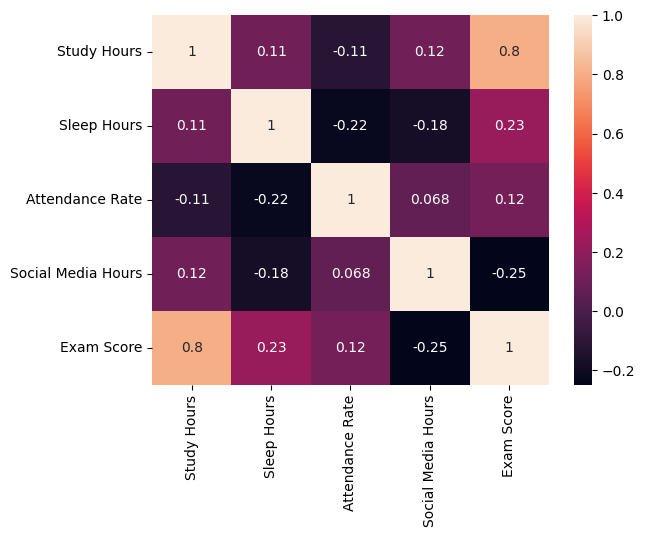

In [234]:
corr=df.corr(numeric_only=True)
sns.heatmap(data=corr,annot=True)
plt.show()

In [235]:
corr["Exam Score"].sort_values(ascending=False)

Exam Score            1.000000
Study Hours           0.804266
Sleep Hours           0.227694
Attendance Rate       0.123791
Social Media Hours   -0.248743
Name: Exam Score, dtype: float64

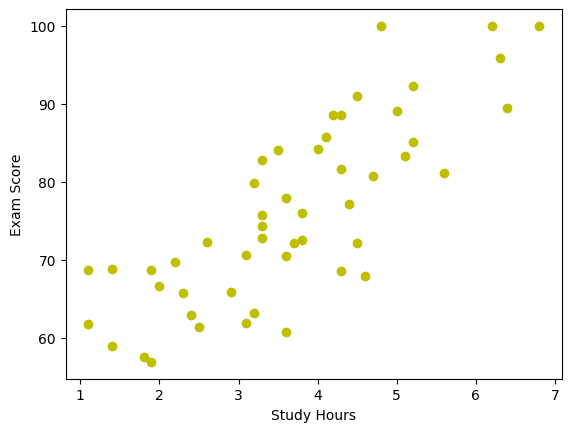

In [236]:
plt.scatter(df["Study Hours"],df["Exam Score"],color="y")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

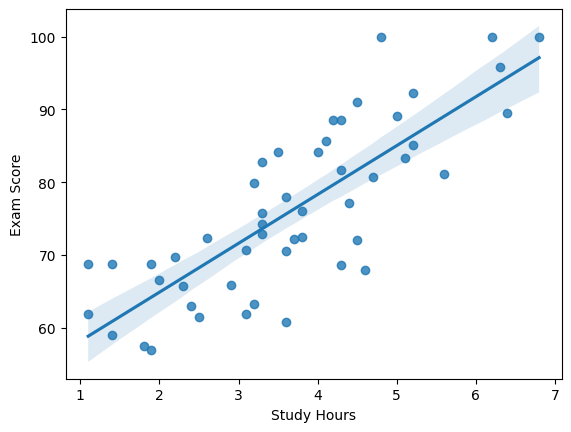

In [237]:
sns.regplot(x=df["Study Hours"],y=df["Exam Score"])
plt.show()

In [238]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [241]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [242]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
regression=LinearRegression()

In [245]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [246]:
y_pred=regression.predict(X_test)

In [247]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  14.744713821185437
mae:  3.170067406626258
rmse:  3.8398846103998276


In [248]:
score=r2_score(y_test,y_pred)
score

0.8702442761946607